In [1]:
import pandas as pd
GROUND_TRUTH_METADATA_FILE = "/home/etaylor/code_projects/thesis/data/metadata/ground_truth_metadata.csv"

### Option 1 - Load the ground truth dataset

In [2]:
# load the ground_truth_df from the csv file
ground_truth_df = pd.read_csv(GROUND_TRUTH_METADATA_FILE)
print(f"length of ground truth df: {len(ground_truth_df)}")
ground_truth_df.head()

length of ground truth df: 50


,image_number,image_path,week_number,clear,cloudy,amber
0,IMG_2198,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,48,148,10
1,IMG_2153,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,38,120,28
2,IMG_2145,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,51,110,61
3,IMG_2129,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,75,216,9
4,IMG_1875,/sise/home/etaylor/images/raw_images/week8_07_...,week8_07_06_2023,7,77,9


### Option 2 - Calculate the Ground Truth Dataset

In [5]:
import pickle
import pandas as pd
import config

#load annotated data
with open('/home/etaylor/code_projects/thesis/metadata/images_annotated.pkl', 'rb') as f:
    users_annotated_data = pickle.load(f)
    
users_annotated_df = pd.DataFrame(users_annotated_data, columns=['image_number'])
users_annotated_df.head()

,image_number
0,IMG_2129
1,IMG_2198
2,IMG_0546
3,IMG_1079
4,IMG_0543


In [6]:

# Get the ground truth from the annotated metadata csv
annotation_tracking_df = pd.read_csv(config.ANNOTATIONS_TRACKING_METADATA_FILE)

# filter all records where done column is True
annotation_tracking_df = annotation_tracking_df[annotation_tracking_df.done == True]
print(f"Number of records in the annotation tracking metadata file: {len(annotation_tracking_df)}")

# convert Time column to datetime from strtime
annotation_tracking_df['Time'] = pd.to_datetime(annotation_tracking_df['Time'], format='%d-%m-%Y_%H-%M-%S')

# filter all records that the image_number are in users_annotated_df or the Time is past 2024
annotation_working_df = annotation_tracking_df[annotation_tracking_df.image_number.isin(users_annotated_df.image_number) | (annotation_tracking_df.Time > '2024-01-01')]
print(f"Number of records in the annotation tracking metadata file that are also annotated by users: {len(annotation_working_df)}")
annotation_working_df.head()

Number of records in the annotation tracking metadata file: 55
Number of records in the annotation tracking metadata file that are also annotated by users: 50


,image_number,annotator,Time,done
0,IMG_2198,dorins,2023-12-15 19:26:10,True
1,IMG_2153,dorins,2023-12-15 19:26:10,True
3,IMG_2145,Nirmalka,2023-12-15 19:26:10,True
4,IMG_2129,Nirmalka,2023-12-15 19:26:10,True
5,IMG_1875,dorins,2023-12-15 19:26:10,True


In [ ]:
from src.annotation_handling.segmentsai_handler import SegmentsAIHandler
segments_handler = SegmentsAIHandler()

ground_truth_trichome_distribution = {}
# get the trichome distribution for each annotated image dataset
for image_number in annotation_working_df.image_number:
    print(f"get the distribution for image {image_number}")
    trichome_distribution = segments_handler.get_trichome_distribution(image_number)
    ground_truth_trichome_distribution[image_number] = trichome_distribution
    print(f"Distribution for image {image_number}: \n{trichome_distribution}")

In [ ]:
# organize the ground truth to a df
images_annotations = []
# create a csv file for each image path and the trichome value
for image_number, image_dist in ground_truth_trichome_distribution.items():
    image_path = config.get_image_path(image_number)
    week, zoom_type = config.find_image_details(image_number)
    images_annotations.append({"image_number": image_number,
                                "image_path":image_path,
                                "week_number": week,
                                "clear": image_dist.get("clear", 0),
                                "cloudy": image_dist.get("cloudy", 0),
                                "amber": image_dist.get("amber", 0)})
ground_truth_df = pd.DataFrame(images_annotations)

# save the ground_truth_df to a csv file with timestamp
ground_truth_df.to_csv(GROUND_TRUTH_METADATA_FILE, index=False)

ground_truth_df.head()

,image_number,image_path,week_number,clear,cloudy,amber
0,IMG_2198,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,48,148,10
1,IMG_2153,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,38,120,28
2,IMG_2145,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,51,110,61
3,IMG_2129,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,75,216,9
4,IMG_1875,/sise/home/etaylor/images/raw_images/week8_07_...,week8_07_06_2023,7,77,9


In [ ]:
ground_truth_df['week_number'].value_counts()

week_number
week9_15_06_2023    13
week6_22_05_2023    11
week5_18_05_2023    10
week7_01_06_2023     9
week8_07_06_2023     7
Name: count, dtype: int64

### Get Test Data Only

In [1]:
import pandas as pd
# load the test df csv
test_df_path = "/home/etaylor/code_projects/thesis/data/test_data_01-05-2024_11-57-23.csv"
test_df = pd.read_csv(test_df_path)
print(f"Number of records in the test df: {len(test_df)}")
test_df.head(10)

Number of records in the test df: 10


,image_number,image_path,week_number,clear,cloudy,amber
0,IMG_0542,/sise/home/etaylor/images/raw_images/week6_22_...,week6_22_05_2023,36,49,0
1,IMG_2198,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,48,148,10
2,IMG_1753,/sise/home/etaylor/images/raw_images/week8_07_...,week8_07_06_2023,74,21,0
3,IMG_1093,/sise/home/etaylor/images/raw_images/week7_01_...,week7_01_06_2023,33,143,36
4,IMG_0019,/sise/home/etaylor/images/raw_images/week5_18_...,week5_18_05_2023,144,100,4
5,IMG_1096,/sise/home/etaylor/images/raw_images/week7_01_...,week7_01_06_2023,30,121,39
6,IMG_2271,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,23,58,12
7,IMG_2285,/sise/home/etaylor/images/raw_images/week9_15_...,week9_15_06_2023,30,128,12
8,IMG_1079,/sise/home/etaylor/images/raw_images/week7_01_...,week7_01_06_2023,68,79,6
9,IMG_0058,/sise/home/etaylor/images/raw_images/week5_18_...,week5_18_05_2023,78,31,0


In [19]:
# print the images paths
for image_path in test_df.image_path:
    print(image_path)

/sise/home/etaylor/images/raw_images/week6_22_05_2023/3x_regular/IMG_0542.JPG
/sise/home/etaylor/images/raw_images/week9_15_06_2023/3x_regular/IMG_2198.JPG
/sise/home/etaylor/images/raw_images/week8_07_06_2023/3x_regular/IMG_1753.JPG
/sise/home/etaylor/images/raw_images/week7_01_06_2023/3x_regular/IMG_1093.JPG
/sise/home/etaylor/images/raw_images/week5_18_05_2023/3x_regular/IMG_0019.JPG
/sise/home/etaylor/images/raw_images/week7_01_06_2023/3x_regular/IMG_1096.JPG
/sise/home/etaylor/images/raw_images/week9_15_06_2023/3x_regular/IMG_2271.JPG
/sise/home/etaylor/images/raw_images/week9_15_06_2023/3x_regular/IMG_2285.JPG
/sise/home/etaylor/images/raw_images/week7_01_06_2023/3x_regular/IMG_1079.JPG
/sise/home/etaylor/images/raw_images/week5_18_05_2023/3x_regular/IMG_0058.JPG


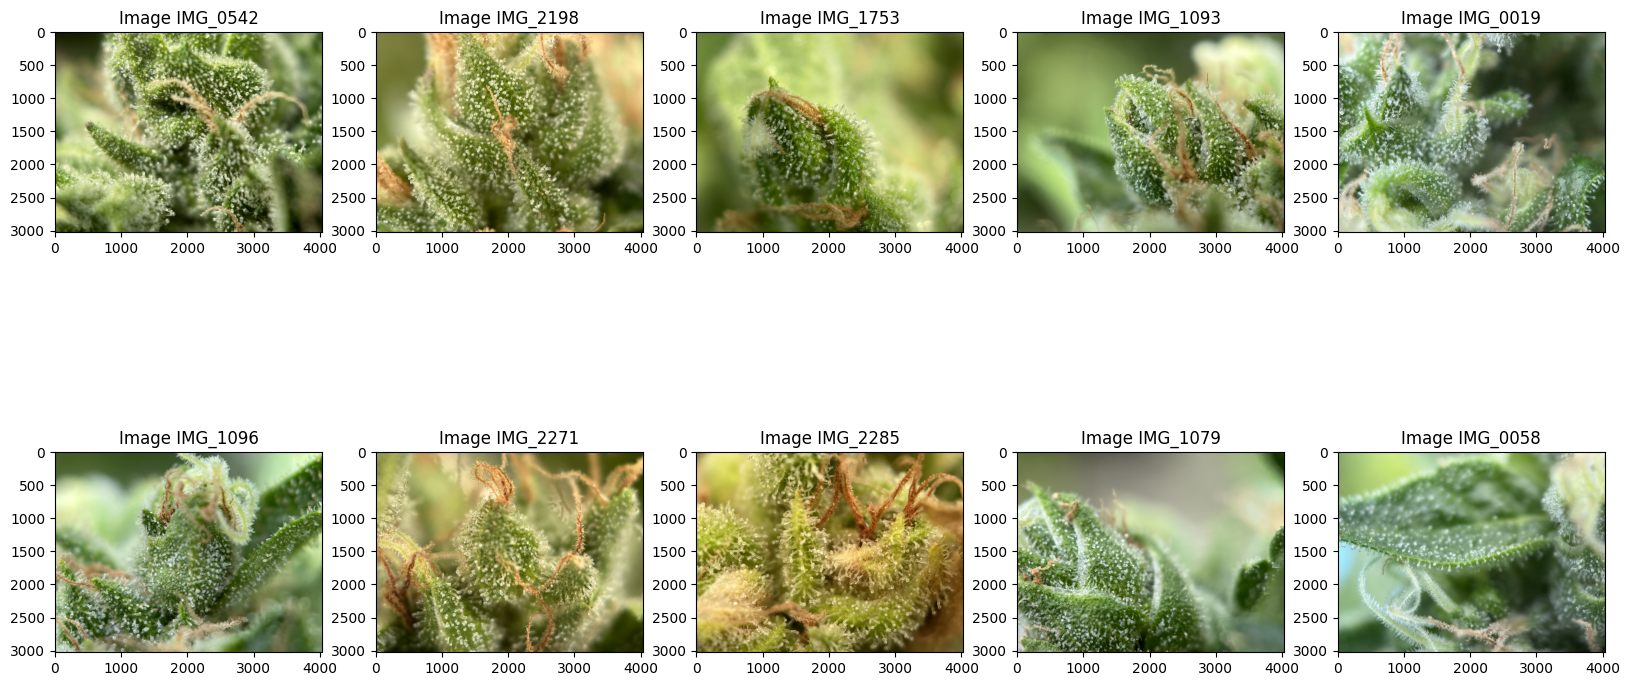

In [2]:
# plot the 10 images using the image path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axs.flat):
    image_path = test_df.image_path[i]
    image_number = test_df.image_number[i]
    image = mpimg.imread(image_path)
    ax.imshow(image)
    ax.set_title(f"Image {image_number}")
plt.show()

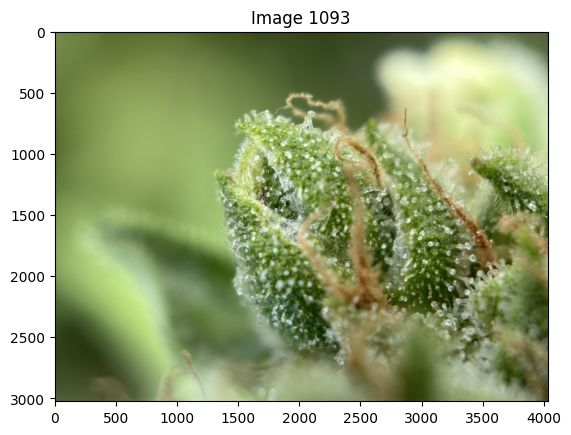

In [3]:
# plot image 1093
image_path = test_df.image_path[3]
image = mpimg.imread(image_path)
plt.imshow(image)
plt.title("Image 1093")
plt.show()

### Preprocess patches of the test data for inference with the models

In [4]:
from src.pipelines.preprocessing_pipeline import preprocess_single_image


# preprocess each image in the df to a dict
preprocessed_images = {}

for index, row in test_df.iterrows():
    image_number = row["image_number"]
    image_path = row["image_path"]
    preprocessed_image = preprocess_single_image(image_path, image_number)
    preprocessed_images[image_number] = preprocessed_image


### Evaluation Function

Here we should add all the eval functions.
We should use both classification and regression metrics.
For the classification we will use precision, recall, mAP, Confusion Matrix
We should use RMSE,MSE, MAE, R-squared

Each Model was trained on 100 epochs on the same data which includes
40 training images and 10 evaluation images.


#### Evaluation Functions

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0  # Exclude zero values to avoid division by zero
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100


def calculate_extended_metrics(ground_truth_df, preds_df, model_name):
    # Merge the DataFrames on the image_number column
    merged_df = pd.merge(ground_truth_df, preds_df, on="image_number", suffixes=('_actual', '_pred'))

    # Initialize dictionary to store results
    results = {"model_name": model_name}

    # Calculate metrics for each trichome type and overall
    trichome_types = ['clear', 'cloudy', 'amber']
    all_actuals = []
    all_preds = []

    for trichome_type in trichome_types:
        actual = merged_df[f'{trichome_type}_actual']
        pred = merged_df[f'{trichome_type}_pred']

        # Collect data for overall calculations
        all_actuals.append(actual)
        all_preds.append(pred)

        # Regression metrics
        mse = mean_squared_error(actual, pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        mape = calculate_mape(actual, pred)
        
        results[f'{trichome_type} RMSE'] = rmse
        results[f'{trichome_type} MSE'] = mse
        results[f'{trichome_type} MAE'] = mae
        results[f'{trichome_type} MAPE'] = mape
        results[f'{trichome_type} R2'] = r2
        

    # Calculate overall metrics
    all_actuals = np.concatenate(all_actuals)
    all_preds = np.concatenate(all_preds)

    overall_mse = mean_squared_error(all_actuals, all_preds)
    overall_rmse = np.sqrt(overall_mse)
    overall_mae = mean_absolute_error(all_actuals, all_preds)
    overall_r2 = r2_score(all_actuals, all_preds)
    overall_mape = calculate_mape(all_actuals, all_preds)

    results['Overall RMSE'] = overall_rmse
    results['Overall MSE'] = overall_mse
    results['Overall MAE'] = overall_mae
    results['Overall MAPE'] = overall_mape
    results['Overall R2'] = overall_r2
    
    # calculate mean duration
    results['Mean Prediction Time'] = preds_df['prediction_time'].mean()
    
    results_df = pd.DataFrame([results])
    
    return results_df

### Detectron2 Functions

In [6]:
import time

def detect_trichome_dist(preprocessed_image, predictor, model_framework_type="detectron"):
    class_counts = {'clear': 0, 'cloudy': 0, 'amber': 0}
    
    if model_framework_type == "detectron":
        # Detectron2 prediction logic
        for image, _ in preprocessed_image:
            start_time = time.time()  # Start timing
            outputs = predictor(image)
            end_time = time.time()  # End timing
            
            # Calculate prediction time
            prediction_time = end_time - start_time
            
            # Extract predictions
            pred_classes = outputs['instances'].pred_classes.cpu().tolist()
            for class_id in pred_classes:
                class_counts[config.ANNOTATIONS_CLASS_MAPPINGS[class_id]] += 1
        return class_counts, prediction_time

    elif model_framework_type == "ultralytics":
        # Ultralytics prediction logic
        start_time = time.time()  # Start timing for Ultralytics
        for image, _ in preprocessed_image:
            outputs = predictor(image, imgsz=512, verbose=False)
            for pred in outputs:
                for c in pred.boxes.cls:
                    class_counts[{0: 'clear', 1: 'cloudy', 2: 'amber'}[int(c)]] += 1
        end_time = time.time()  # End timing
        prediction_time = end_time - start_time  # Calculate prediction time for Ultralytics
        return class_counts, prediction_time

    else:
        raise ValueError("Invalid model_framework_type provided. Choose 'detectron' or 'ultralytics'.")



def create_predictions_df(preprocessed_images, predictor, model_framework_type="detectron"):
    """
    Create a DataFrame of predictions for each image using a specified prediction model.
    Includes the prediction time.
    """
    preds_list = []
    for image_number, image_data in preprocessed_images.items():
        print(f"Predicting image {image_number}")
        
        trichome_dist, pred_time = detect_trichome_dist(image_data, predictor, model_framework_type)
        
        # Append the results to the list
        preds_list.append({
            "image_number": image_number,
            "clear": trichome_dist.get("clear", 0),
            "cloudy": trichome_dist.get("cloudy", 0),
            "amber": trichome_dist.get("amber", 0),
            "prediction_time": pred_time  # Store prediction time
        })

    # Convert the list of predictions to a DataFrame
    predictions_df = pd.DataFrame(preds_list)
    return predictions_df


### Inference Using Detectron2 models

In [7]:
# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

In [8]:
# setup all the models configurations for that evaluation experiment
models_configs = [
    {
        "model_name": "mask_rcnn_R_50_FPN_3x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/config.yaml"
    },
    {
        "model_name": "mask_rcnn_X_101_32x8d_FPN_3x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/config.yaml"
    },
    {
        "model_name": "faster_rcnn_R_50_C4_1x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml"
    },
    {
        "model_name": "faster_rcnn_R_50_DC5_1x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/config.yaml"
    },
]

In [9]:
import config

models_scores = []
models_preds = {}
for model_config in models_configs:
    
    cfg = get_cfg()
    # load config
    cfg.merge_from_file(model_config['yaml_file'])
    
    # load checkpoint
    cfg.MODEL.WEIGHTS = model_config['checkpoint']
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    
    # define predictor
    predictor = DefaultPredictor(cfg)
    
    preds_df = create_predictions_df(preprocessed_images, predictor)
    models_preds[model_config['model_name']] = preds_df
    results_df = calculate_extended_metrics(test_df, preds_df, model_config['model_name'])
    models_scores.append(results_df)
    
# Concatenate the results into a single DataFrame
models_scores_df = pd.concat(models_scores, ignore_index=True)
models_scores_df

[05/03 16:42:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/model_final.pth ...


INFO:fvcore.common.checkpoint:[Checkpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/model_final.pth ...


Predicting image IMG_0542


/home/etaylor/.conda/envs/detectron/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Predicting image IMG_2198
Predicting image IMG_1753
Predicting image IMG_1093
Predicting image IMG_0019
Predicting image IMG_1096
Predicting image IMG_2271
Predicting image IMG_2285
Predicting image IMG_1079
Predicting image IMG_0058


[05/03 16:42:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/model_final.pth ...


INFO:fvcore.common.checkpoint:[Checkpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/model_final.pth ...


Predicting image IMG_0542
Predicting image IMG_2198
Predicting image IMG_1753
Predicting image IMG_1093
Predicting image IMG_0019
Predicting image IMG_1096
Predicting image IMG_2271
Predicting image IMG_2285
Predicting image IMG_1079
Predicting image IMG_0058


[05/03 16:43:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth ...


INFO:fvcore.common.checkpoint:[Checkpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth ...


Predicting image IMG_0542
Predicting image IMG_2198
Predicting image IMG_1753
Predicting image IMG_1093
Predicting image IMG_0019
Predicting image IMG_1096
Predicting image IMG_2271
Predicting image IMG_2285
Predicting image IMG_1079
Predicting image IMG_0058


[05/03 16:43:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/model_final.pth ...


INFO:fvcore.common.checkpoint:[Checkpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/model_final.pth ...


Predicting image IMG_0542
Predicting image IMG_2198
Predicting image IMG_1753
Predicting image IMG_1093
Predicting image IMG_0019
Predicting image IMG_1096
Predicting image IMG_2271
Predicting image IMG_2285
Predicting image IMG_1079
Predicting image IMG_0058


,model_name,clear RMSE,clear MSE,clear MAE,clear MAPE,clear R2,cloudy RMSE,cloudy MSE,cloudy MAE,cloudy MAPE,...,amber MSE,amber MAE,amber MAPE,amber R2,Overall RMSE,Overall MSE,Overall MAE,Overall MAPE,Overall R2,Mean Prediction Time
0,mask_rcnn_R_50_FPN_3x,17.372392,301.8,15.0,28.075074,0.751163,56.271662,3166.5,48.9,68.990540,...,81.0,5.4,39.438339,0.559998,34.396221,1183.100000,23.1,46.174982,0.434437,0.060914
1,mask_rcnn_X_101_32x8d_FPN_3x,21.149468,447.3,18.3,37.914500,0.631196,40.707493,1657.1,31.7,37.301556,...,87.8,5.8,45.073260,0.523059,27.032080,730.733333,18.6,39.543458,0.650684,0.119902
2,faster_rcnn_R_50_C4_1x,23.851625,568.9,19.3,39.540011,0.530936,43.786984,1917.3,31.5,42.195857,...,50.7,4.1,23.650794,0.724591,29.079775,845.633333,18.3,36.404231,0.595758,0.172638
3,faster_rcnn_R_50_DC5_1x,27.597101,761.6,21.4,45.462863,0.372052,57.745996,3334.6,45.4,55.809353,...,41.4,4.6,33.119658,0.775110,37.137582,1379.200000,23.8,46.094806,0.340695,0.094291


In [10]:
models_scores_df.to_csv("/home/etaylor/code_projects/thesis/data/detectron_models_scores.csv", index=False)

In [11]:
detectron_models_scores_df = pd.read_csv("/home/etaylor/code_projects/thesis/data/detectron_models_scores.csv")

### Inference Using Ultralytics Models

In [7]:
# setup models configs
ultralytics_models_configs = [
    {
        "model_name": "rtdetr_x",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train14/weights/best.pt"
    },
    {
        "model_name": "yolov5xu",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train17/weights/best.pt"
    },
    {
        "model_name": "yolov8x",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train16/weights/best.pt"
    },
    {
        "model_name": "yolov9c",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train12/weights/best.pt"
    }
]

In [11]:
from ultralytics import RTDETR
from ultralytics import YOLO


ultralytics_models_scores = []
ultralytics_models_preds = {}
for model_config in ultralytics_models_configs:
    if model_config['model_name'] == "rtdetr_x":
        predictor = RTDETR(model_config['checkpoint'])
    else:
        predictor = YOLO(model_config['checkpoint'])
    print(f"Predicting with model: {model_config['model_name']}")
    preds_df = create_predictions_df(preprocessed_images, predictor, 'ultralytics')
    ultralytics_models_preds[model_config['model_name']] = preds_df
    results_df = calculate_extended_metrics(test_df, preds_df, model_config['model_name'])
    ultralytics_models_scores.append(results_df)
    
# Concatenate the results into a single DataFrame
ultralytics_models_scores_df = pd.concat(ultralytics_models_scores, ignore_index=True)
ultralytics_models_scores_df

Predicting with model: rtdetr_x
Predicting image IMG_0542
Predicting image IMG_2198
Predicting image IMG_1753
Predicting image IMG_1093
Predicting image IMG_0019
Predicting image IMG_1096
Predicting image IMG_2271
Predicting image IMG_2285
Predicting image IMG_1079
Predicting image IMG_0058
Predicting with model: yolov5xu
Predicting image IMG_0542
Predicting image IMG_2198
Predicting image IMG_1753
Predicting image IMG_1093
Predicting image IMG_0019
Predicting image IMG_1096
Predicting image IMG_2271
Predicting image IMG_2285
Predicting image IMG_1079
Predicting image IMG_0058
Predicting with model: yolov8x
Predicting image IMG_0542
Predicting image IMG_2198
Predicting image IMG_1753
Predicting image IMG_1093
Predicting image IMG_0019
Predicting image IMG_1096
Predicting image IMG_2271
Predicting image IMG_2285
Predicting image IMG_1079
Predicting image IMG_0058
Predicting with model: yolov9c
Predicting image IMG_0542
Predicting image IMG_2198
Predicting image IMG_1753
Predicting image

,model_name,clear RMSE,clear MSE,clear MAE,clear MAPE,clear R2,cloudy RMSE,cloudy MSE,cloudy MAE,cloudy MAPE,...,amber MSE,amber MAE,amber MAPE,amber R2,Overall RMSE,Overall MSE,Overall MAE,Overall MAPE,Overall R2,Mean Prediction Time
0,rtdetr_x,29.571946,874.5,24.7,47.792319,0.278965,117.584013,13826.0,106.0,144.473048,...,63.6,5.8,50.067155,0.654517,70.152453,4921.366667,45.500000,84.189769,-1.352583,1.681301
1,yolov5xu,18.646716,347.7,14.3,28.409520,0.713318,59.581037,3549.9,51.1,72.257931,...,91.7,5.7,39.798535,0.501874,36.465966,1329.766667,23.700000,47.602380,0.364326,1.788026
2,yolov8x,39.033319,1523.6,35.4,89.500875,-0.256225,27.804676,773.1,20.9,21.420547,...,155.9,6.7,45.451770,0.153132,28.592540,817.533333,21.000000,52.865801,0.609191,0.375425
3,yolov9c,19.416488,377.0,17.6,34.919824,0.689159,70.657625,4992.5,61.7,88.715209,...,91.0,5.8,38.076923,0.505677,42.663411,1820.166667,28.366667,55.662548,0.129897,0.323414


In [12]:
ultralytics_models_scores_df.to_csv("/home/etaylor/code_projects/thesis/data/ultralytics_models_scores.csv", index=False)

In [12]:
ultralytics_models_scores_df = pd.read_csv("/home/etaylor/code_projects/thesis/data/ultralytics_models_scores.csv")

In [13]:
all_models_results_df = pd.concat([detectron_models_scores_df, ultralytics_models_scores_df], ignore_index=True)
all_models_results_df

,model_name,clear RMSE,clear MSE,clear MAE,clear MAPE,clear R2,cloudy RMSE,cloudy MSE,cloudy MAE,cloudy MAPE,...,amber MSE,amber MAE,amber MAPE,amber R2,Overall RMSE,Overall MSE,Overall MAE,Overall MAPE,Overall R2,Mean Prediction Time
0,mask_rcnn_R_50_FPN_3x,17.372392,301.8,15.0,28.075074,0.751163,56.271662,3166.5,48.9,68.990540,...,81.0,5.4,39.438339,0.559998,34.396221,1183.100000,23.100000,46.174982,0.434437,0.060914
1,mask_rcnn_X_101_32x8d_FPN_3x,21.149468,447.3,18.3,37.914500,0.631196,40.707493,1657.1,31.7,37.301556,...,87.8,5.8,45.073260,0.523059,27.032080,730.733333,18.600000,39.543458,0.650684,0.119902
2,faster_rcnn_R_50_C4_1x,23.851625,568.9,19.3,39.540011,0.530936,43.786984,1917.3,31.5,42.195857,...,50.7,4.1,23.650794,0.724591,29.079775,845.633333,18.300000,36.404231,0.595758,0.172638
3,faster_rcnn_R_50_DC5_1x,27.597101,761.6,21.4,45.462863,0.372052,57.745996,3334.6,45.4,55.809353,...,41.4,4.6,33.119658,0.775110,37.137582,1379.200000,23.800000,46.094806,0.340695,0.094291
4,rtdetr_x,29.571946,874.5,24.7,47.792319,0.278965,117.584013,13826.0,106.0,144.473048,...,63.6,5.8,50.067155,0.654517,70.152453,4921.366667,45.500000,84.189769,-1.352583,1.681301
5,yolov5xu,18.646716,347.7,14.3,28.409520,0.713318,59.581037,3549.9,51.1,72.257931,...,91.7,5.7,39.798535,0.501874,36.465966,1329.766667,23.700000,47.602380,0.364326,1.788026
6,yolov8x,39.033319,1523.6,35.4,89.500875,-0.256225,27.804676,773.1,20.9,21.420547,...,155.9,6.7,45.451770,0.153132,28.592540,817.533333,21.000000,52.865801,0.609191,0.375425
7,yolov9c,19.416488,377.0,17.6,34.919824,0.689159,70.657625,4992.5,61.7,88.715209,...,91.0,5.8,38.076923,0.505677,42.663411,1820.166667,28.366667,55.662548,0.129897,0.323414


### Analyze predictions Results
In this section we will analyze with graphs the results received by predicting the 10 test images.

<Figure size 1400x1000 with 0 Axes>

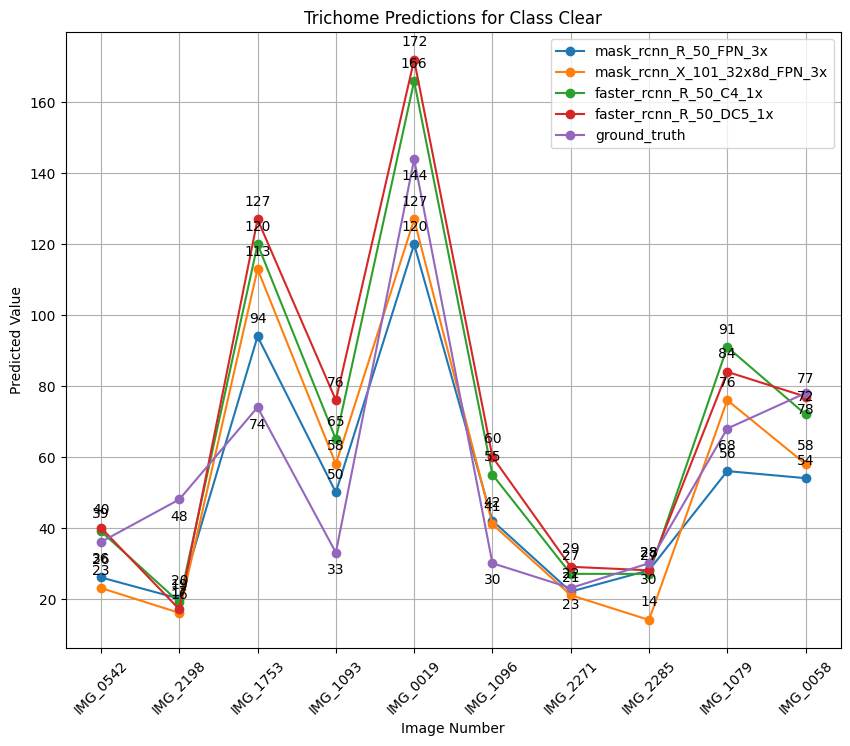

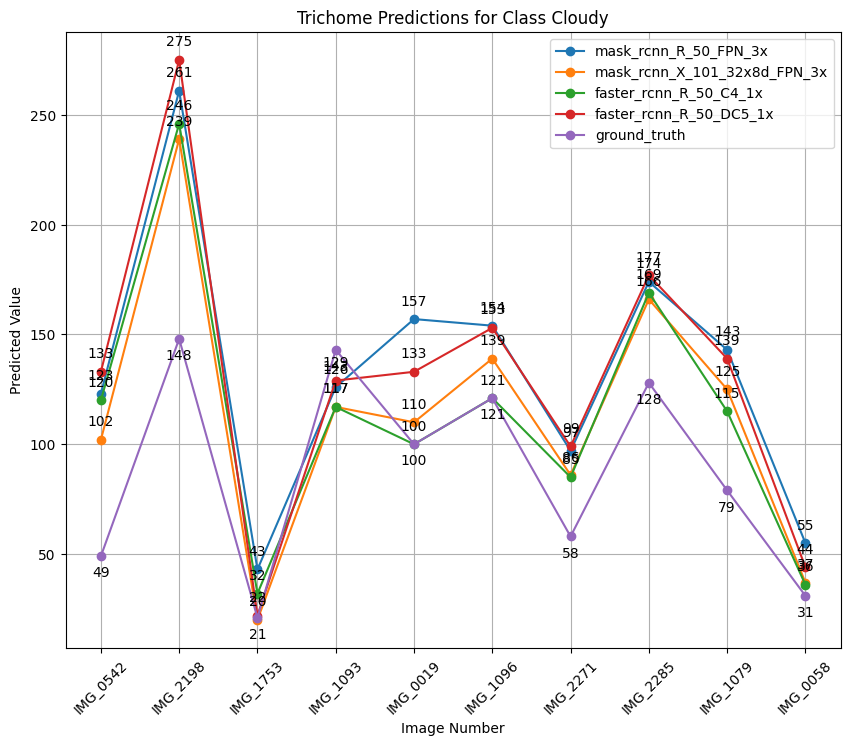

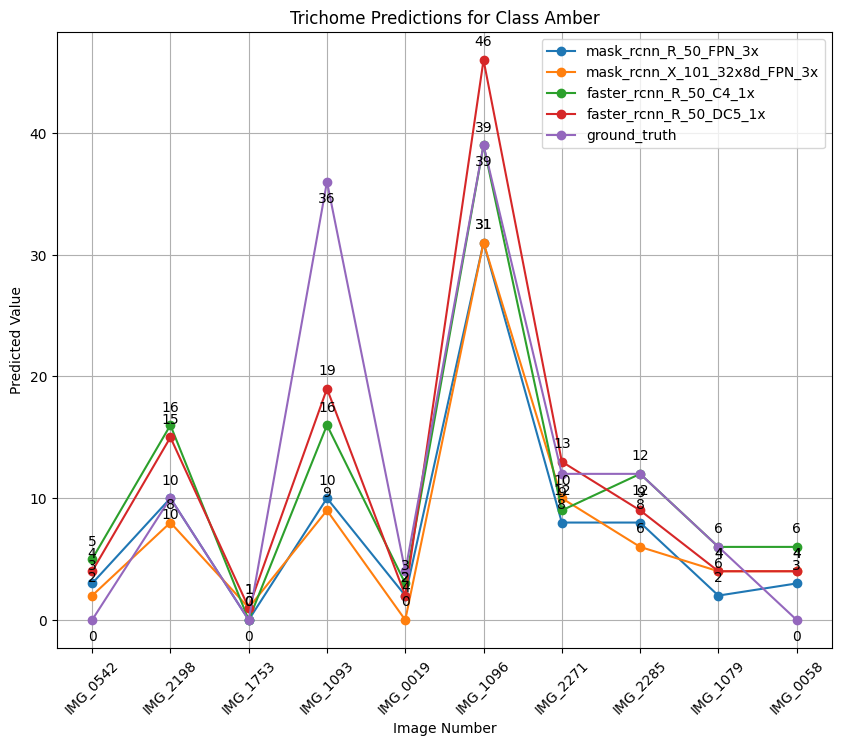

In [14]:
import matplotlib.pyplot as plt

# Assuming 'test_df' is your DataFrame containing the ground truth and 'models_preds' is a dictionary of DataFrames containing model predictions

# Set up the plotting environment
plt.figure(figsize=(14, 10))

# Define models including ground truth for clarity in plotting and annotations
models_preds['ground_truth'] = test_df  # Add ground truth to the models dictionary for unified handling

# Plot each trichome type
for column in ['clear', 'cloudy', 'amber']:
    plt.figure(figsize=(10, 8))  # Create a new figure for each trichome type
    
    for model_name, preds_df in models_preds.items():
        plt.plot(preds_df['image_number'], preds_df[column], marker='o', label=model_name)
        # Annotate each point
        for i, txt in enumerate(preds_df[column]):
            # Check if we need a different offset for ground truth to avoid overlap
            offset = (0, 10) if model_name != 'ground_truth' else (0, -15)
            plt.annotate(txt, (preds_df['image_number'][i], preds_df[column][i]), textcoords="offset points", xytext=offset, ha='center')

    # Adding titles and labels
    plt.title(f'Trichome Predictions for Class {column.capitalize()}')
    plt.xlabel('Image Number')
    plt.ylabel('Predicted Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend()  # Show legend to identify which line corresponds to which model
    plt.grid(True)  # Show grid for better readability
    plt.show()


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
#ignore warnings
# Set style for seaborn
sns.set(style="whitegrid")

data = all_models_results_df

##### Plot All Metrics

In [16]:
def plot_results(data, metric):
    plt.figure(figsize=(14, 10))
    plt.subplot(2, 2, 1)
    sns.barplot(x='model_name', y=f'clear {metric}', data=data, palette='viridis')
    plt.title(f'Clear {metric}')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    sns.barplot(x='model_name', y=f'cloudy {metric}', data=data, palette='viridis')
    plt.title(f'Cloudy {metric}')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    sns.barplot(x='model_name', y=f'amber {metric}', data=data, palette='viridis')
    plt.title(f'Amber {metric}')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 4)
    sns.barplot(x='model_name', y=f'Overall {metric}', data=data, palette='viridis')
    plt.title(f'Overall {metric}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

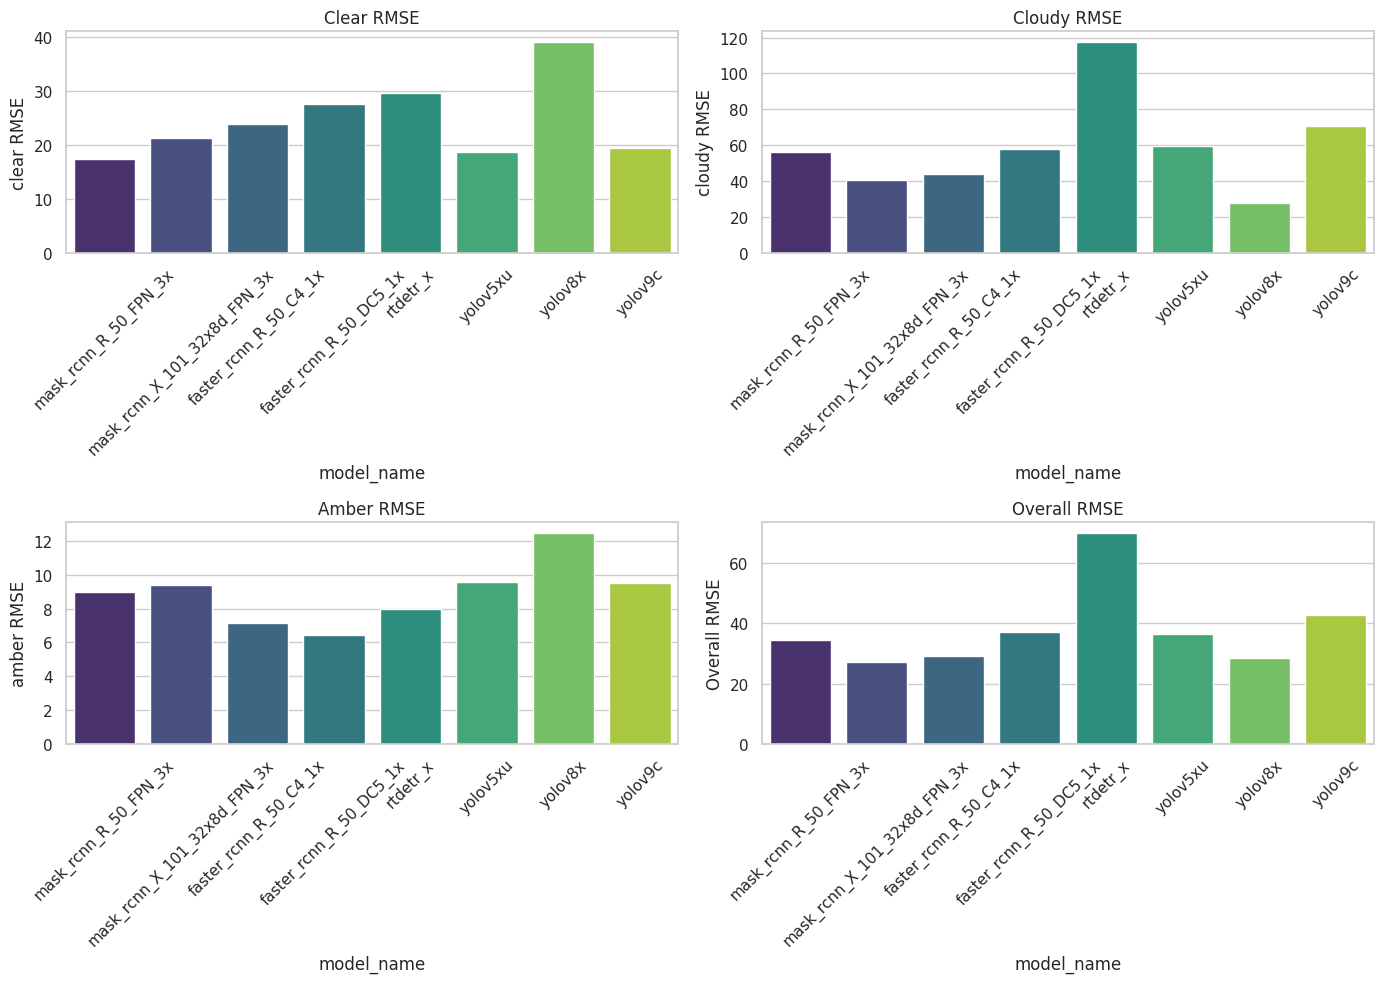

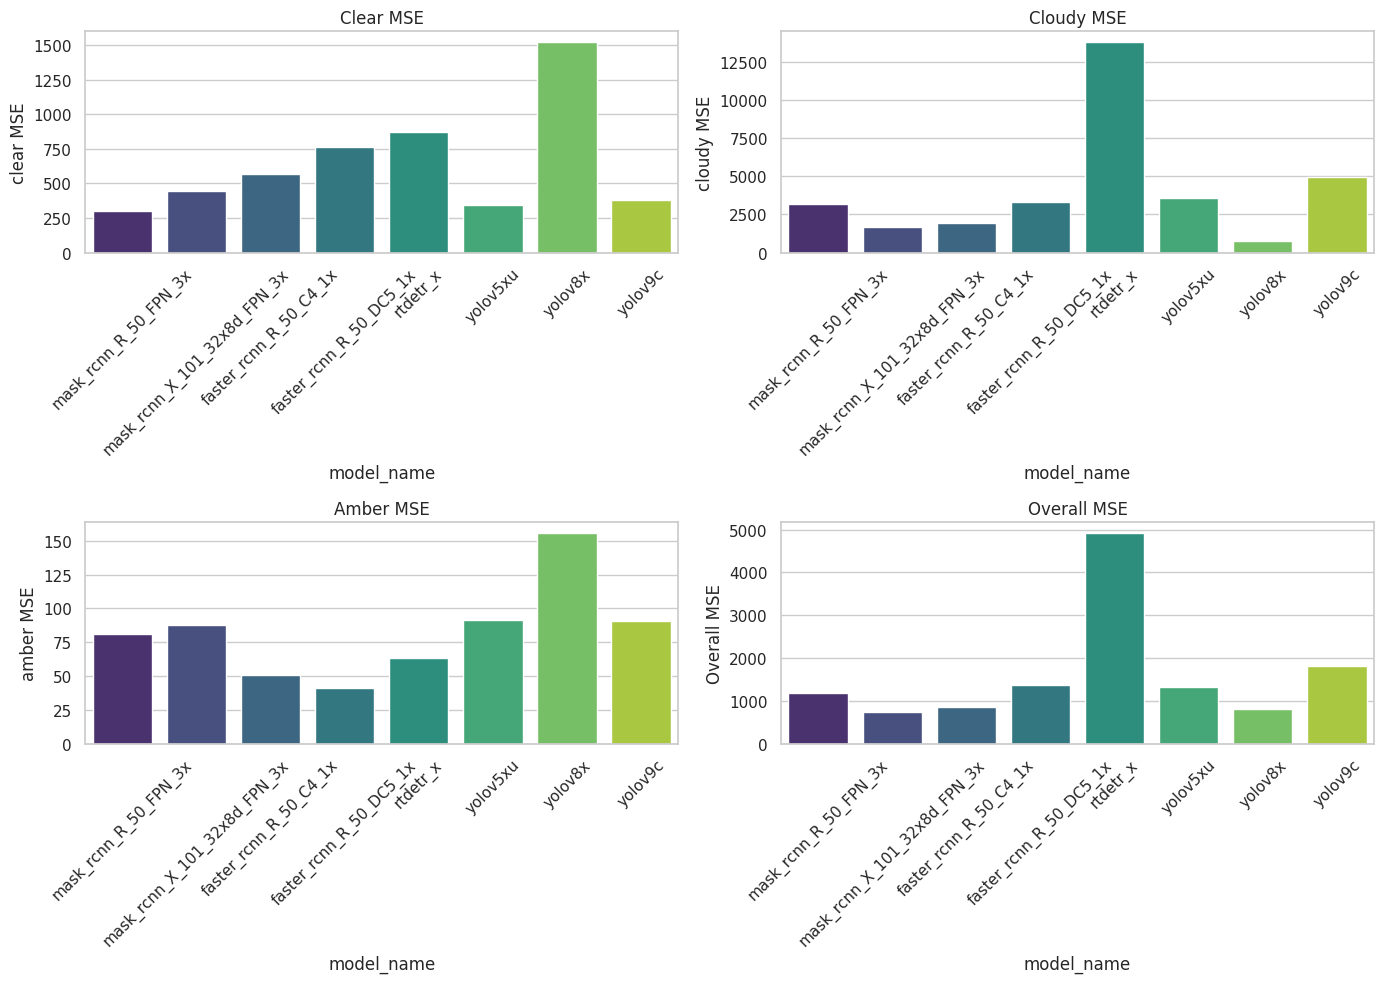

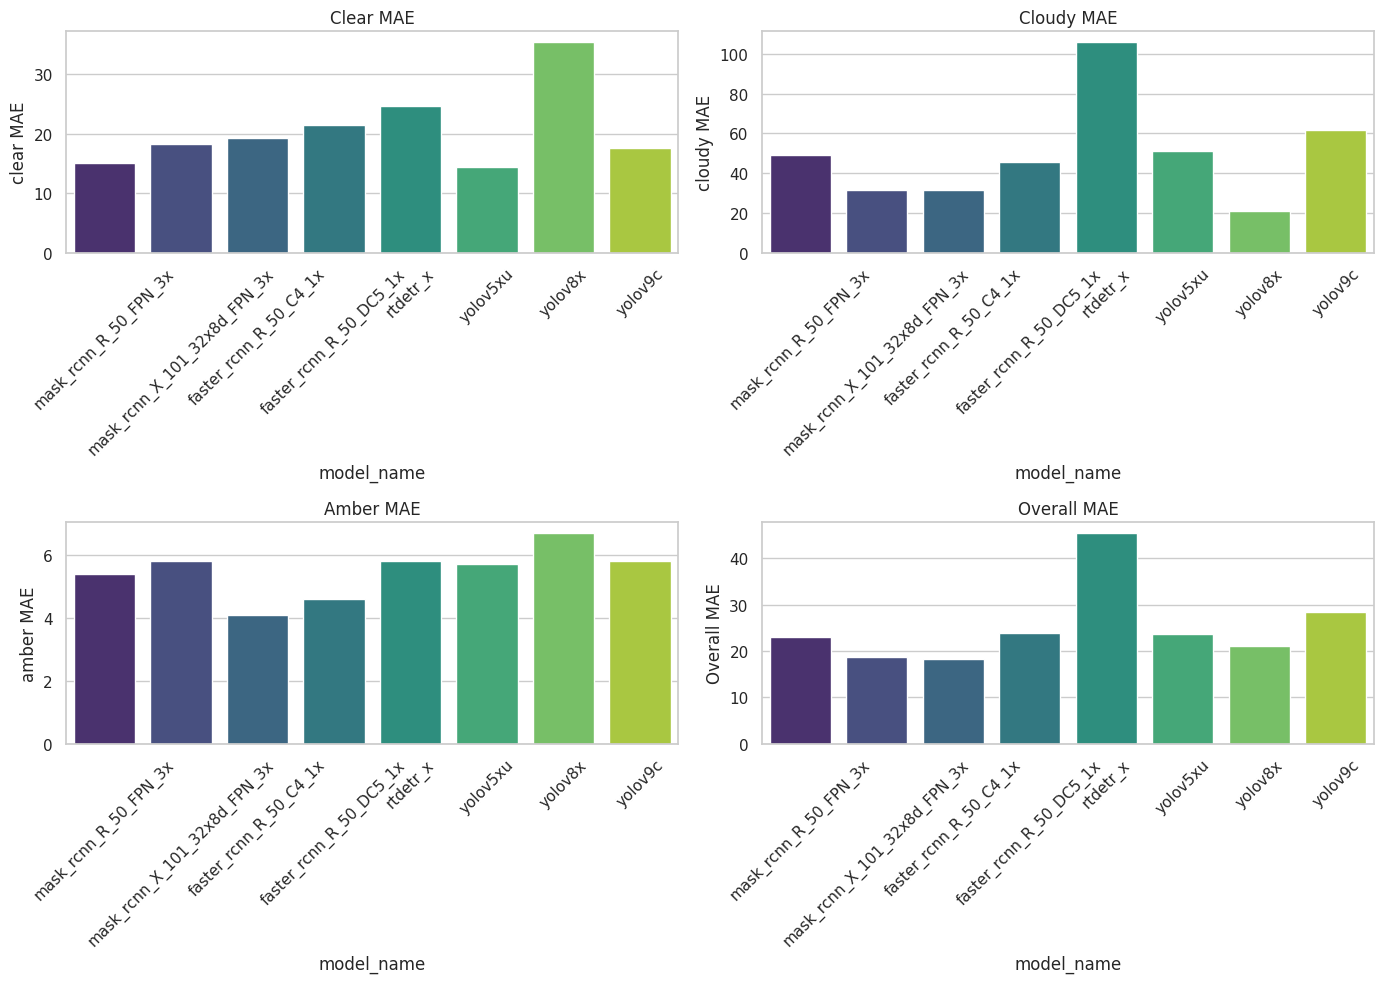

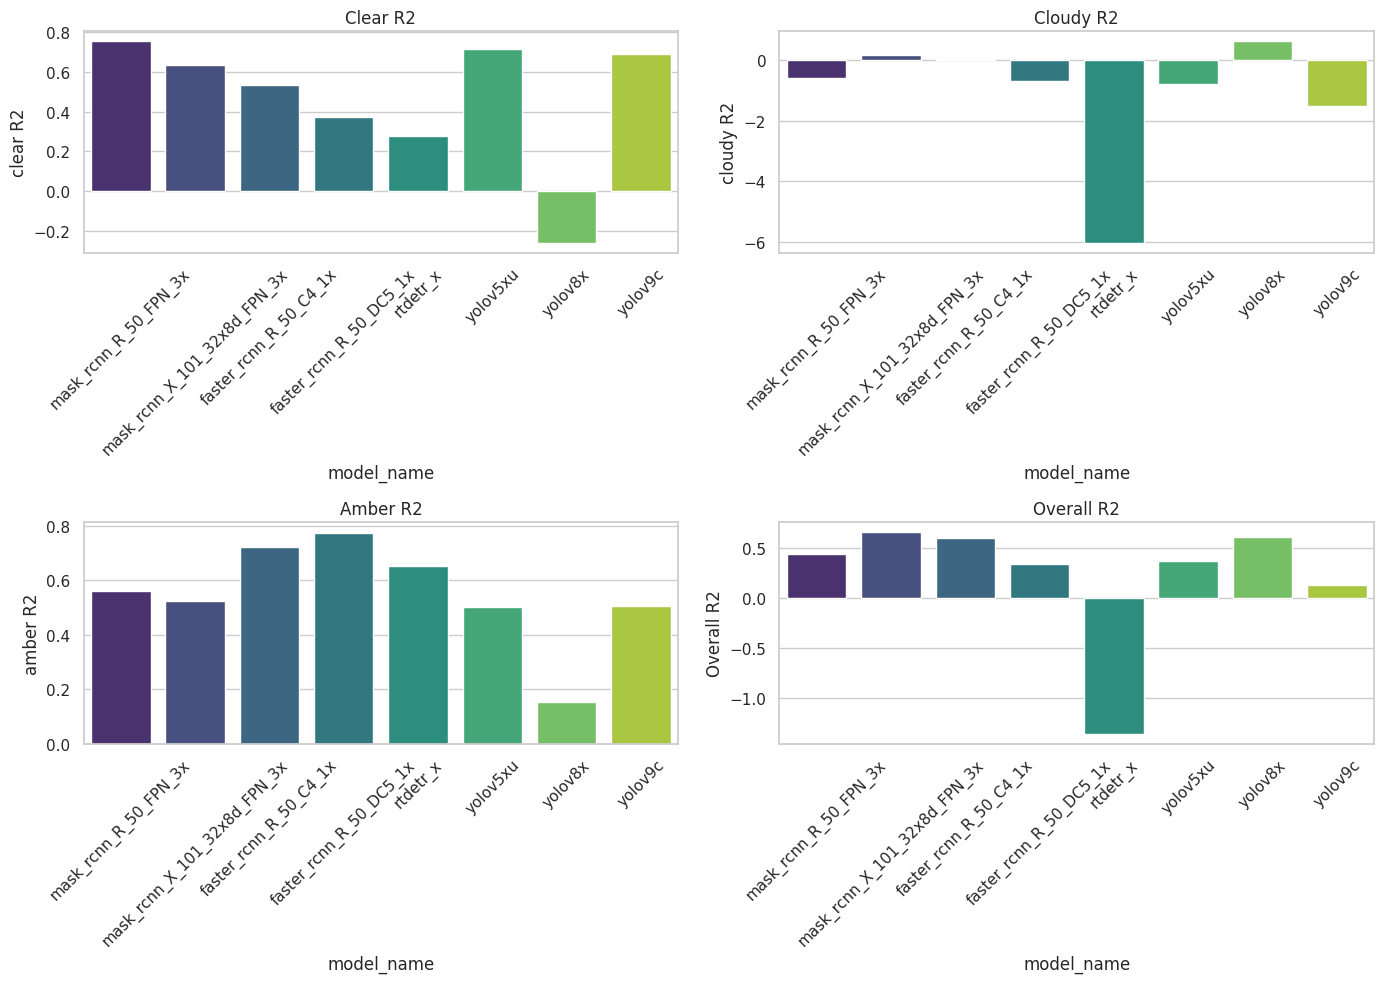

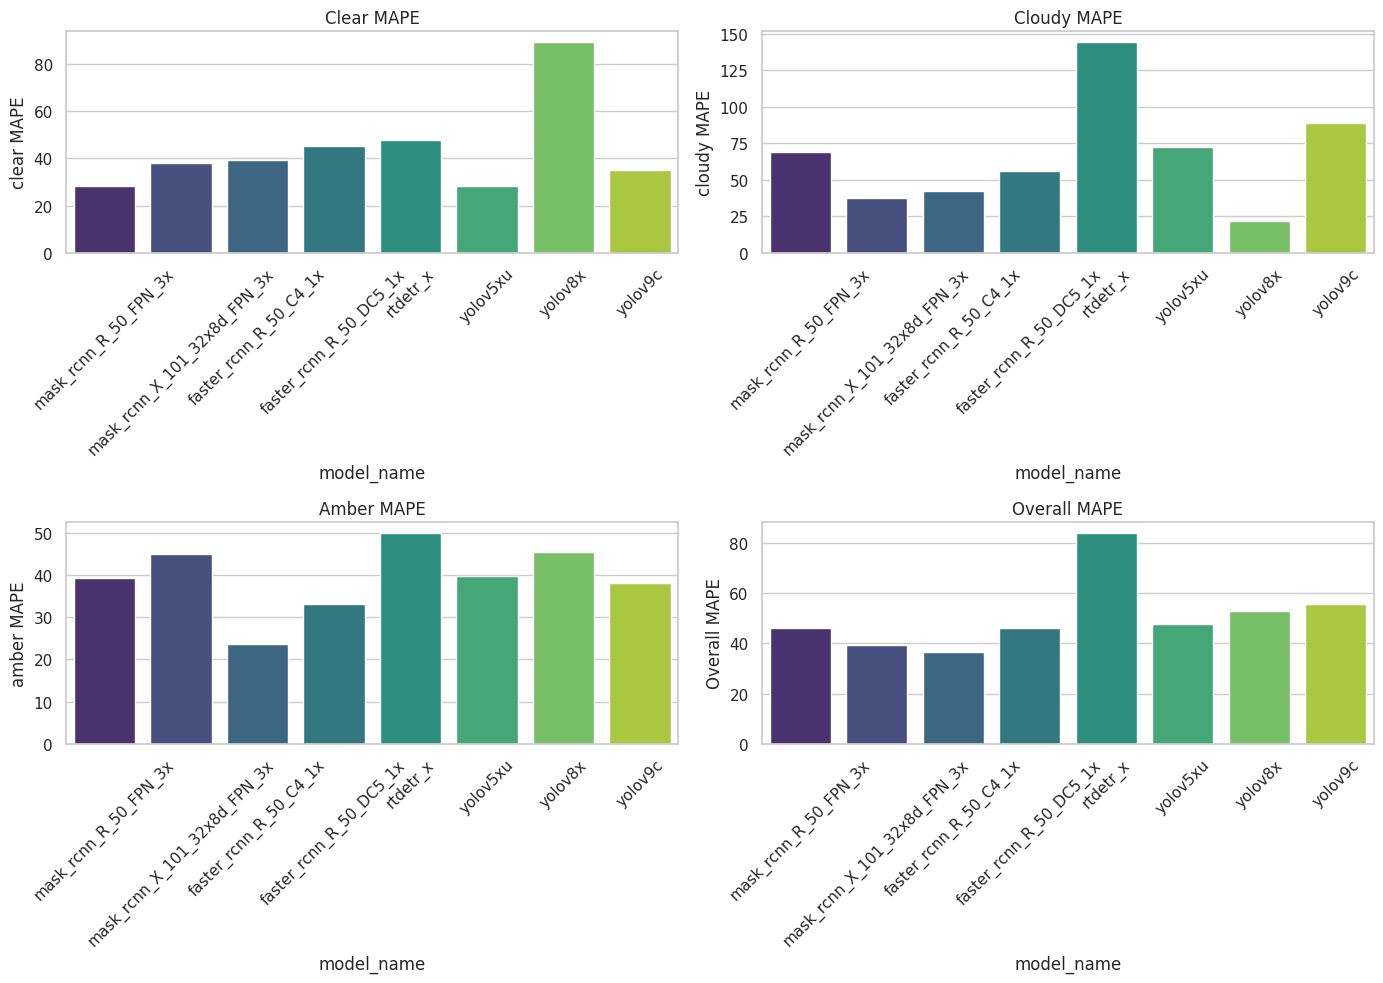

In [17]:
for metric in ['RMSE', 'MSE', 'MAE', 'R2', 'MAPE']:
    plot_results(data, metric)

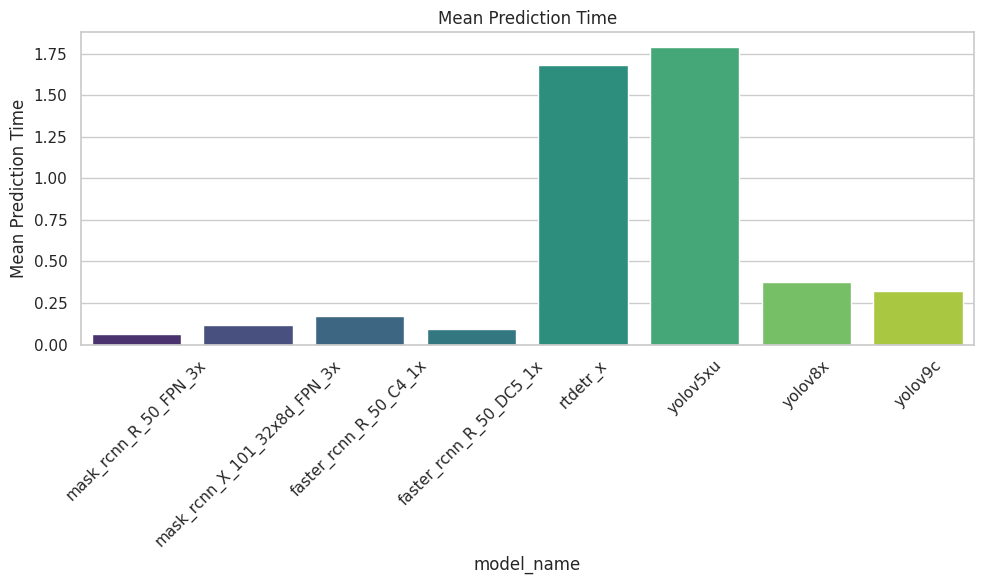

In [18]:
# plot the Mean Time for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='Mean Prediction Time', data=data, palette='viridis')
plt.title('Mean Prediction Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()